In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Summer Olympic medals.csv", encoding='latin-1')

In [3]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [4]:
df.shape

(15433, 11)

In [5]:
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [6]:
df.dtypes

,0
City,object
Year,float64
Sport,object
Discipline,object
Event,object
Athlete,object
Gender,object
Country_Code,object
Country,object
Event_gender,object


In [7]:
df.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [8]:
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(include=['object'])

In [9]:
df_num.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [10]:
print(df.isnull().sum())

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [11]:
df.dropna = df_cleaned = df.dropna()

In [12]:
print(df_cleaned)

           City    Year      Sport       Discipline           Event  \
0      Montreal  1976.0   Aquatics           Diving  3m springboard   
1      Montreal  1976.0   Aquatics           Diving  3m springboard   
2      Montreal  1976.0   Aquatics           Diving  3m springboard   
3      Montreal  1976.0   Aquatics           Diving  3m springboard   
4      Montreal  1976.0   Aquatics           Diving    10m platform   
...         ...     ...        ...              ...             ...   
15428   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15429   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15430   Beijing  2008.0  Wrestling  Wrestling Gre-R       55 - 60kg   
15431   Beijing  2008.0  Wrestling  Wrestling Gre-R       60 - 66kg   
15432   Beijing  2008.0  Wrestling  Wrestling Gre-R      96 - 120kg   

                        Athlete Gender Country_Code        Country  \
0               KÖHLER, Christa  Women          GDR   East Germany   
1      

In [13]:
medals_by_country = df_cleaned.dropna().groupby('Country')['Medal'].count().sort_values(ascending=False)

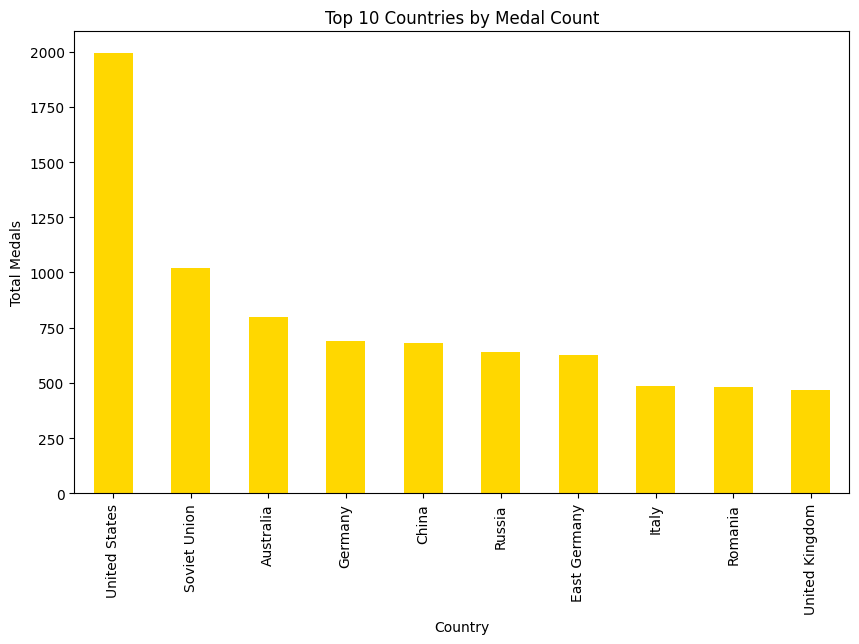

In [14]:
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

<Axes: xlabel='City'>

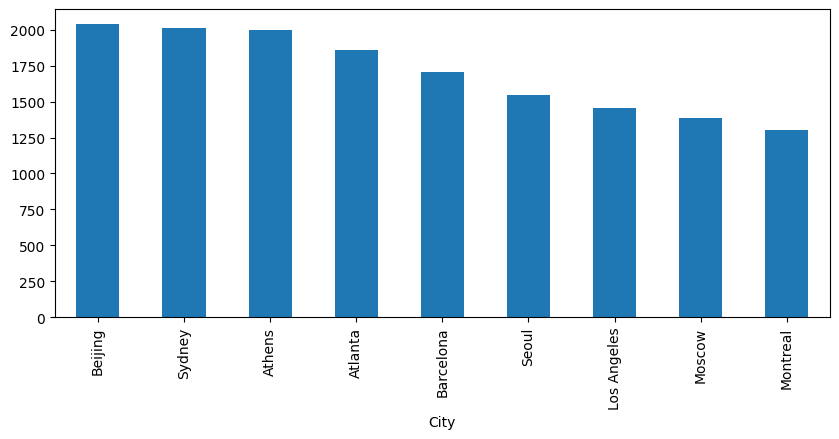

In [45]:
q2_df = df['City'].value_counts()
q2_df.columns = ['City', 'Count']
plt.figure(figsize = (10,4))
q2_df.plot.bar(x = 'City', y = 'Count') # q2_df.plot(kind ='bar', x= 'City', y = 'Count')

In [15]:
medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

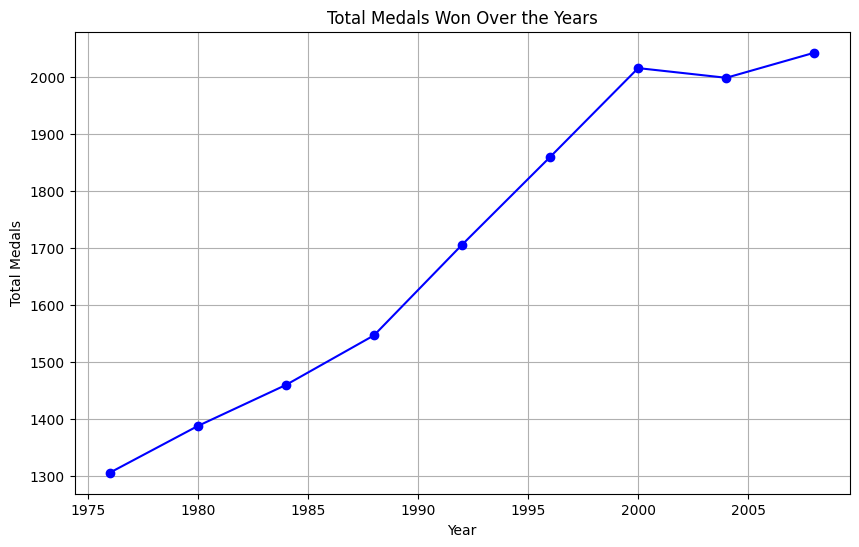

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

In [17]:
gender_distribution = df_cleaned['Gender'].value_counts()

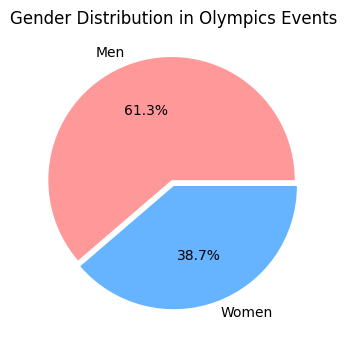

In [18]:
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

<Axes: ylabel='Gender'>

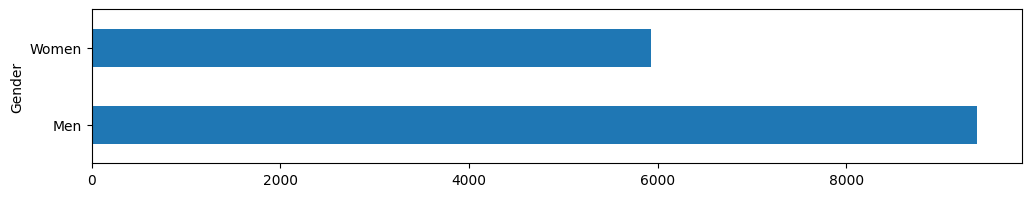

In [47]:
q5_df = df.groupby(['Gender'])['Gender'].count()
plt.figure(figsize = (12,2))
q5_df.plot.barh(x = 'Athlete', y = 'Count')

In [19]:
athlete_medal_count =df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

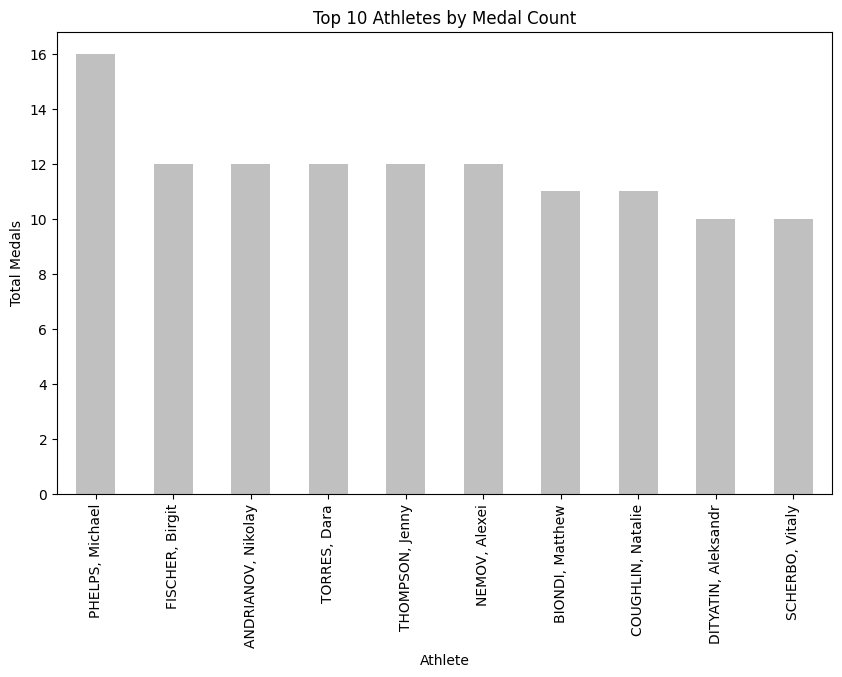

In [20]:
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

In [50]:
q5_df = df[['Event', 'Gender']]
q5_df = q5_df.groupby(['Event','Gender'])['Gender'].count()
q5_df

Event                               Gender
+ 100kg (heavyweight)               Men        16
+ 100kg (super heavyweight)         Men        18
+ 105kg                             Men         9
+ 108kg, total (super heavyweight)  Men         3
+ 110kg, total (super heavyweight)  Men        15
                                             ... 
water polo                          Women     117
épée individual                     Men        27
                                    Women      12
épée team                           Men       114
                                    Women      30
Name: Gender, Length: 379, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import numpy as np

# Create a copy of the original dataframe to avoid SettingWithCopyWarning
df_processed = df.copy()

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df_processed['Country_Code'] = le.fit_transform(df_processed['Country_Code'])
df_processed['Sport'] = le.fit_transform(df_processed['Sport'])
df_processed['Gender'] = le.fit_transform(df_processed['Gender'])
df_processed['Event_gender'] = le.fit_transform(df_processed['Event_gender'])

# Map 'Gold', 'Silver', 'Bronze' to 1 and np.nan to 0
df_processed['Medal'] = df_processed['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, np.nan: 0})

X = df_processed[['Country_Code', 'Sport', 'Gender','Event_gender']]
y = df_processed['Medal']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))


Accuracy: 1.0
Accuracy Score: 1.0
Confusion Matrix:
 [[  28    0]
 [   0 4602]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00      4602

    accuracy                           1.00      4630
   macro avg       1.00      1.00      1.00      4630
weighted avg       1.00      1.00      1.00      4630



In [39]:
y_pred = model.predict(X_test)

In [42]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,
y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[  28    0]
 [   0 4602]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00      4602

    accuracy                           1.00      4630
   macro avg       1.00      1.00      1.00      4630
weighted avg       1.00      1.00      1.00      4630



In [51]:
q6_df = df[['Year', 'Country', 'Medal']]
q6_df = q6_df.groupby(['Year', 'Country', 'Medal'])['Country'].count().reset_index(name = 'Count')
q6_df['Medal'] = pd.Categorical(q6_df['Medal'],
categories=['Gold', 'Silver', 'Bronze'], ordered=True)
q6_df = q6_df.sort_values(ascending = [True, True, True],
by = ['Year', 'Country','Medal'])
q6_df = q6_df.pivot( index = ['Year','Country'], columns =['Medal'], values = ['Count']).reset_index()
q6_df = q6_df.replace(np.nan, 0)
q6_df['Sum'] = q6_df['Count', 'Bronze'] + q6_df['Count','Gold'] + q6_df['Count','Silver']
q6_df = q6_df.sort_values(ascending = [True, False],by = ['Year','Sum'])
q6_df.columns = q6_df.columns.droplevel(0)
q6_df.columns = ['Year', 'Country', 'Gold', 'Silver',
'Bronze', 'Sum']
print(q6_df.Country.unique())
q6_df


['Soviet Union' 'East Germany' 'United States' 'West Germany' 'Poland'
 'Hungary' 'Romania' 'Japan' 'Bulgaria' 'United Kingdom' 'Italy'
 'New Zealand' 'Australia' 'Cuba' 'Canada' 'France' 'Yugoslavia'
 'Korea, South' 'Pakistan' 'Czechoslovakia' 'Netherlands' 'Sweden'
 'Switzerland' 'Belgium' 'Denmark' 'Finland' 'Norway' 'Spain' 'Brazil'
 'Iran' 'Jamaica' 'Korea, North' 'Mexico' 'Portugal' 'Austria' 'Bermuda*'
 'Mongolia' 'Puerto Rico*' 'Thailand' 'Trinidad and Tobago' 'Venezuela'
 'India' 'Zimbabwe' 'Greece' 'Ethiopia' 'Ireland' 'Tanzania' 'Guyana'
 'Lebanon' 'Uganda' 'China' 'Nigeria' 'Kenya' 'Turkey' 'Algeria' 'Morocco'
 'Cameroon' 'Colombia' "Cote d'Ivoire" 'Dominican Republic' 'Egypt'
 'Iceland' 'Peru' 'Syria' 'Taiwan' 'Zambia' 'Argentina' 'Indonesia'
 'Chile' 'Costa Rica' 'Djibouti' 'Netherlands Antilles*' 'Philippines'
 'Senegal' 'Suriname' 'Virgin Islands*' 'Unified team' 'Germany' 'Croatia'
 'Ghana' 'Lithuania' 'Slovenia' 'Estonia'
 'Independent Olympic Participants (1992)' 'La

,Year,Country,Gold,Silver,Bronze,Sum
30,1976.0,Soviet Union,113.0,93.0,79.0,285.0
10,1976.0,East Germany,99.0,51.0,42.0,192.0
37,1976.0,United States,63.0,56.0,36.0,155.0
39,1976.0,West Germany,21.0,24.0,30.0,75.0
26,1976.0,Poland,18.0,29.0,26.0,73.0
...,...,...,...,...,...,...
542,2008.0,Sudan,0.0,1.0,0.0,1.0
548,2008.0,Togo,0.0,0.0,1.0,1.0
550,2008.0,Tunisia,1.0,0.0,0.0,1.0
556,2008.0,Venezuela,0.0,0.0,1.0,1.0


In [53]:
q7_df = df.groupby(['Sport',
'Country'])['Country'].count().reset_index(name ='Count').sort_values(ascending = [True, False],by =['Sport','Count'])
q7_df.Sport.unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

Here i was trying show which country has dominated any particular sport

In [58]:

try:
  inp = input("Select a Sport from above list")
except:
  print("Input is interrupted")
temp = q7_df[q7_df['Sport'] == inp].head(3)
print(temp)

Select a Sport from above listBaseball
        Sport        Country  Count
153  Baseball           Cuba    111
157  Baseball  United States     68
154  Baseball          Japan     64


In [65]:
temp = df[['Athlete','Sport']].drop_duplicates()
temp = temp.groupby(['Athlete'])
for k,v in temp:
  if len(v['Sport'].tolist()) > 1:
    print(k, v['Sport'].tolist())

('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


In [66]:
q9_df = q6_df[['Year', 'Country', 'Sum']].groupby(['Year']).apply(lambda x: x.nlargest(5, 'Sum'))
q9_df = q9_df.pivot(index=['Year'], columns=['Country'], values=['Sum']).reset_index()
q9_df.columns = q9_df.columns.droplevel(0)
# q9_df.columns = ['Year', 'Country', 'Gold', 'Silver', 'Bronze', 'Sum']
q9_df = q9_df.rename(columns={q9_df.columns[0]: "Year"})
q9_df
# temp = q6_df.where(q6_df.Country.isin(q9_df.columns)).dropna()[["Year", "Country", "Sum"]]


/tmp/ipython-input-66-839711209.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  q9_df = q6_df[['Year', 'Country', 'Sum']].groupby(['Year']).apply(lambda x: x.nlargest(5, 'Sum'))


Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976.0,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,285.0,NaN,155.0,75.0,NaN
1,1980.0,NaN,94.0,NaN,NaN,NaN,260.0,NaN,61.0,NaN,NaN,NaN,72.0,NaN,442.0,NaN,NaN,NaN,NaN
2,1984.0,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,333.0,157.0,87.0
3,1988.0,NaN,NaN,NaN,NaN,NaN,174.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,294.0,NaN,193.0,113.0,NaN
4,1992.0,NaN,NaN,NaN,83.0,71.0,NaN,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,224.0,NaN,NaN
5,1996.0,132.0,NaN,NaN,110.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,260.0,NaN,NaN
6,2000.0,183.0,NaN,NaN,79.0,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,188.0,NaN,NaN,248.0,NaN,NaN
7,2004.0,157.0,NaN,NaN,NaN,NaN,NaN,149.0,NaN,102.0,NaN,NaN,NaN,192.0,NaN,NaN,264.0,NaN,NaN
8,2008.0,149.0,NaN,NaN,184.0,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,143.0,NaN,NaN,315.0,NaN,NaN


In [67]:
q9_df = q6_df[['Year', 'Country', 'Sum']].groupby(['Year']).apply(lambda x: x.nlargest(5, 'Sum'))['Country'].drop_duplicates()
temp = q6_df.where(q6_df.Country.isin(q9_df)).dropna()[["Year", "Country", "Sum"]]
temp = temp.pivot(index=['Year'], columns=['Country'], values=['Sum']).reset_index()
temp.columns = temp.columns.droplevel(0)
temp = temp.rename(columns={temp.columns[0]: "Year"})
q9_df = temp.replace(np.nan, 0)
q9_df


/tmp/ipython-input-67-868107070.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  q9_df = q6_df[['Year', 'Country', 'Sum']].groupby(['Year']).apply(lambda x: x.nlargest(5, 'Sum'))['Country'].drop_duplicates()


Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976.0,24.0,39.0,20.0,0.0,24.0,192.0,0.0,55.0,31.0,17.0,73.0,55.0,0.0,285.0,0.0,155.0,75.0,19.0
1,1980.0,12.0,94.0,0.0,0.0,20.0,260.0,0.0,61.0,37.0,0.0,50.0,72.0,0.0,442.0,0.0,0.0,0.0,57.0
2,1984.0,50.0,0.0,86.0,76.0,0.0,0.0,0.0,0.0,63.0,42.0,0.0,106.0,0.0,0.0,0.0,333.0,157.0,87.0
3,1988.0,34.0,41.0,21.0,53.0,0.0,174.0,0.0,44.0,29.0,77.0,21.0,51.0,0.0,294.0,0.0,193.0,113.0,63.0
4,1992.0,57.0,17.0,44.0,83.0,71.0,0.0,198.0,45.0,46.0,49.0,42.0,53.0,0.0,0.0,223.0,224.0,0.0,0.0
5,1996.0,132.0,21.0,51.0,110.0,57.0,0.0,124.0,43.0,71.0,66.0,21.0,38.0,115.0,0.0,0.0,260.0,0.0,26.0
6,2000.0,183.0,13.0,31.0,79.0,69.0,0.0,119.0,53.0,65.0,73.0,24.0,46.0,188.0,0.0,0.0,248.0,0.0,26.0
7,2004.0,157.0,17.0,17.0,94.0,61.0,0.0,149.0,40.0,102.0,52.0,12.0,39.0,192.0,0.0,0.0,264.0,0.0,0.0
8,2008.0,149.0,5.0,34.0,184.0,47.0,0.0,101.0,27.0,42.0,78.0,20.0,22.0,143.0,0.0,0.0,315.0,0.0,0.0


In [68]:
q9_df.Germany = q9_df.Germany + q9_df['East Germany'] + q9_df['West Germany']
q9_df.Russia = q9_df['Soviet Union'] + q9_df.Russia + q9_df['Unified team']
q9_df = q9_df.drop(['Yugoslavia', 'Poland', 'Korea, South', 'Italy', 'Hungary', 'Cuba', 'Canada', 'Bulgaria', 'East Germany', 'West Germany', 'Soviet Union', 'Unified team'], axis=1)
q9_df = q9_df.set_index('Year')
q9_df


Country,Australia,China,Germany,Romania,Russia,United States
Year,,,,,,
1976.0,24.0,0.0,267.0,55.0,285.0,155.0
1980.0,12.0,0.0,260.0,72.0,442.0,0.0
1984.0,50.0,76.0,157.0,106.0,0.0,333.0
1988.0,34.0,53.0,287.0,51.0,294.0,193.0
1992.0,57.0,83.0,198.0,53.0,223.0,224.0
1996.0,132.0,110.0,124.0,38.0,115.0,260.0
2000.0,183.0,79.0,119.0,46.0,188.0,248.0
2004.0,157.0,94.0,149.0,39.0,192.0,264.0
2008.0,149.0,184.0,101.0,22.0,143.0,315.0


<Axes: xlabel='Year'>

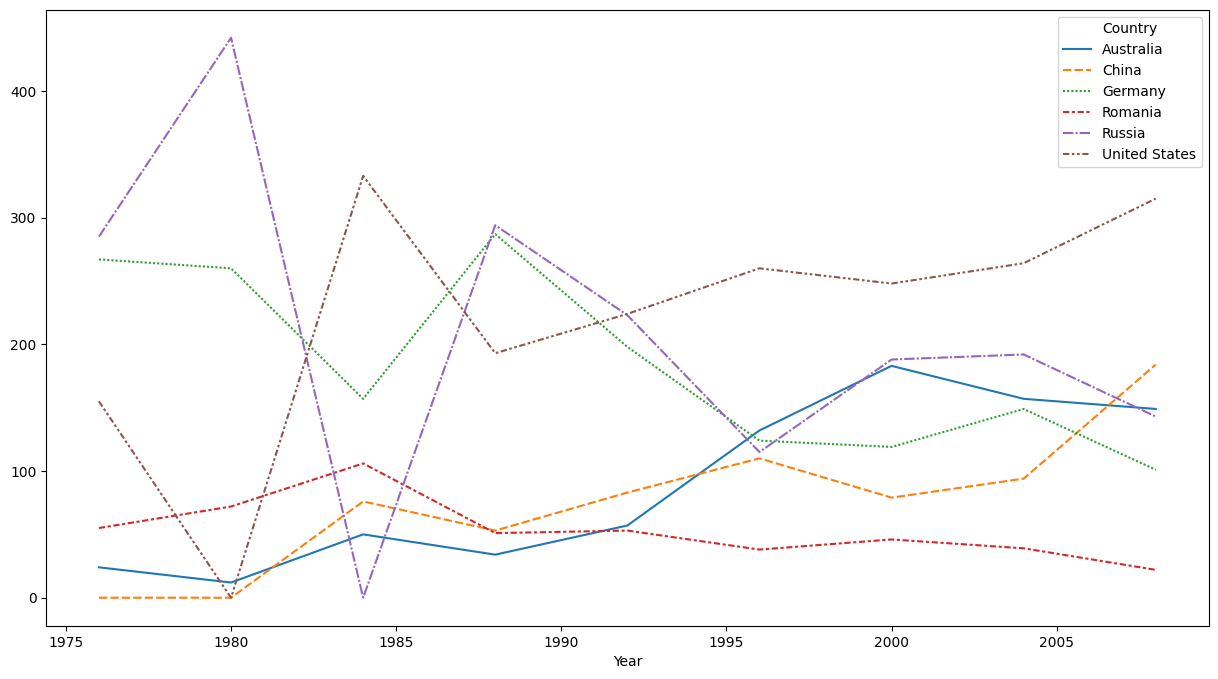

In [71]:
# q9_df.plot(x = 'Year', y= q9_data.columns[1:])
import seaborn as sns
plt.figure(figsize=(15,8))
sns.lineplot(data = q9_df)

● Soviet Union(Russia here) dominated Olypics with decline over time except
1982 where it boycotted entire olypics.

● US after boycotting 1980 olypics, rose up to be the dominating player here.

● Germany as a whole country inlcuding (west and east), saw continous decline
over period of time.

● China and Australia has witnessed steady rise in their medal tally

● Romania has been same overpeiod with little decline.
Note: The number do not represent number of medal but the total people who won it.

E.g., Winner in hockey gets one gold, but 16 people are given the medal. So here we are counting 16.

Any comments or suggestion or correction is most welcomed.

Thank you very much.

The End.